In [59]:
# Step 1: Import necessary libraries
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression

In [60]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [53]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise
 

In [54]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features
 

In [4]:
#step3 create linear regression model
model=LinearRegression()#initialize the model

In [6]:
#step4:Train the model using the dataset
model.fit(X,Y)# the model learns the best_fit line by minimizing the error 

LinearRegression()

In [13]:
#step5:get the values of slope and intercept
print("slope",model.coef_)#coefficient(slope) of the regression line
print("Intercept",model.intercept_)#Intercept(where the line crocess the y axis)

slope [4.96549814]
Intercept 27.430065779800536


In [15]:
# Step 6: Display the equation of the line
m = model.coef_[0]  # Assuming a simple linear regression, m is the slope
c = model.intercept_  # c is the intercept
print(f"Equation of the line: Y = {m:.2f}X + {c:.2f}")

Equation of the line: Y = 4.97X + 27.43


In [16]:
# step 7 predict values using the model
Y_pred=model.predict(X)# predict salaries for the given experience values

**Model_Evauation_Techniques**

1.Mean squares Error(MSE)

In [17]:
#1.Mean squares Error(MSE)-Measures average squared difference between actual and predicted values
mse=mean_squared_error(Y,Y_pred)
print(f"Mean squared Error(MSE):{mse:.2f}")

Mean squared Error(MSE):11.75


2.Mean Absolutre Error(MAE)

In [18]:
#2.Mean Absolutre Error(MAE)-Measures the average absolute difference between actual and predicted values
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error(MAE):{mae:.2f}")

Mean Absolute Error(MAE):2.87


3.Root Mean Squared Error(RMSE)

In [21]:
#Root Mean Square Error(RMSE)- measeures  standard deviation of residuals(errors)
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE):{rmse:.2f}")

Root Mean Squared Error(RMSE):3.43


R-squared(R²)

In [24]:
#4.R-squared(R²)-Represents how well the model fits the data
r2=r2_score(Y,Y_pred)
print(f"R-squared(R²):{r2:.2f}")

R-squared(R²):0.95


5.Adjusted R-squared(R²_adj)

In [26]:
#5.Adjusted R-squared(R²_adj)-Adjusted for the number of predicteds, better for the multiple regression
n=len(Y)#Number of Obsrevations
p=1#Number of independent varaiables(Experience)\
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared:{adj_r2:.2f}")

Adjusted R-squared:0.94


**OLS (Ordinary Least Squares) Regression**

In [57]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:10:50   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


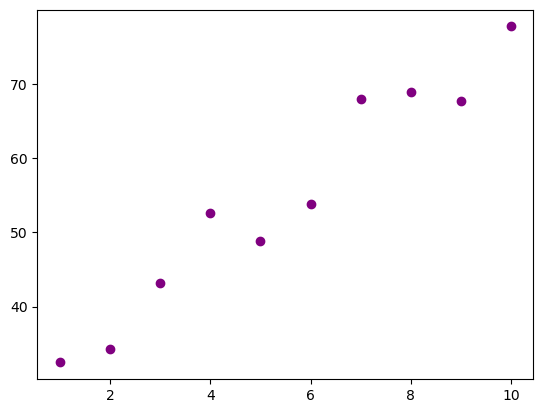

In [27]:
#step 8 :plot the actual data points
plt.scatter(X,Y,color="purple",label='Actual Data')

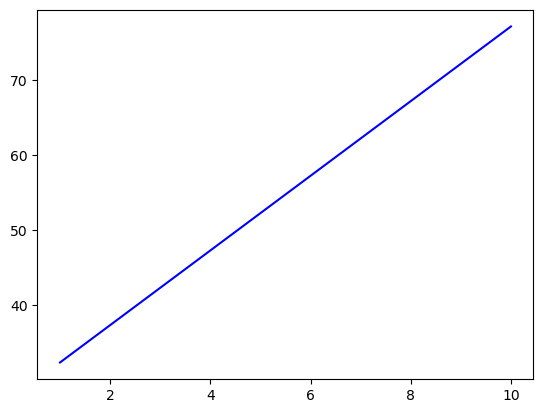

In [31]:
#step 9:plot the regression line(Best fit line)
plt.plot(X,Y_pred,color='blue',label='Best fit line')#Regression line

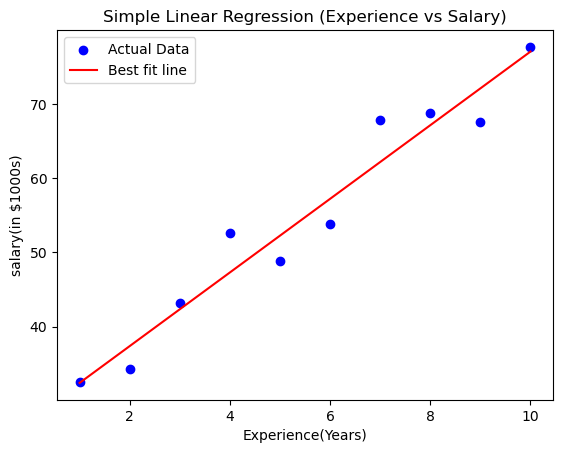

In [32]:
#step 8:plot the actual data points
plt.scatter(X,Y,color='blue',label='Actual Data')

#step 9:plot the regression line (best fit line)
plt.plot(X,Y_pred,color='red',label='Best fit line')#Regression line

#step 10:Add labels and legend
plt.xlabel('Experience(Years)')
plt.ylabel('salary(in $1000s)')
plt.title('Simple Linear Regression (Experience vs Salary)')
plt.legend()

#step 11:Display the graph
plt.show()#show the final plotted graph

**Prediction**

In [36]:
#user can input experience and the model predicts  salary
while True:
    try:
        exp=float(input("\n Enter the years of experience to predict the salary(or -1 to exit):"))
        if exp<-1:
            break
        predicted_salary=model.predict(np.array([[exp]]))[0]
        print(f"Predicted salary for {exp} years of experience:${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter the valid number!")


 Enter the years of experience to predict the salary(or -1 to exit): 5


Predicted salary for 5.0 years of experience:$52.26K



 Enter the years of experience to predict the salary(or -1 to exit): 12


Predicted salary for 12.0 years of experience:$87.02K



 Enter the years of experience to predict the salary(or -1 to exit): -2
